# E06: Logistic difference system

In [1]:
import os, sys
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
sys.path.append(os.path.abspath('../utils'))
import surd as surd
import it_tools as it

# Configure matplotlib to use LaTeX for text rendering and set font size
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 20})

## System definition

In [2]:
def logistic(N, q10 = 0.2, q20=0.4, r1=3.8, r2=3.5, beta2to1=0.02, beta1to2=0.1):
    # Initialize arrays for the state variables with zeros
    q1 = np.zeros(N); q2 = np.zeros(N)
    q1[0] = q10; q2[0] = q20

    # Simulate the system over N time steps
    for t in range(0, N-1):
        q1[t+1] = q1[t] * (r1 - r1 * q1[t] - beta2to1 * q2[t])
        q2[t+1] = q2[t] * (r2 - r2 * q2[t] - beta1to2 * q1[t])
    return q1, q2

## One-way coupling $Q_2 \rightarrow Q_1$

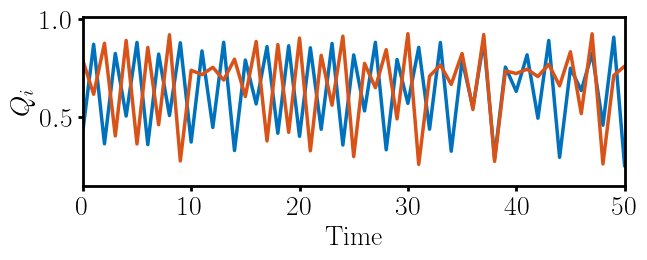

In [3]:
# System integration
N = 10**7
nbins = 100
nlag = 1
q1, q2 = logistic(N, q10 = 0.2, q20=0.4, r1=3.7, r2=3.7, beta2to1=0.1,beta1to2=0)
X = np.array([q1, q2])
nvars = X.shape[0]

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(7, 3))
axs.plot(X[0, -1000:], linewidth=2.5, color="#0072BD", label=f'$\\rm{{Prey}}$')
axs.plot(X[1, -1000:], linewidth=2.5, color="#D95319", label=f'$\\rm{{Predator}}$')
axs.set_xlim(0, 50)  # Set x-axis limits
axs.set_ylim(0.15, 1.01)  # Set x-axis limits
axs.set_ylabel(f'$Q_i$')
axs.set_xlabel(f'$\\rm{{Time}}$')
plt.tight_layout()
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(2)
axs.tick_params(width=2)
plt.show()

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0635
    Unique (U):
        (1,)        : 0.6409
        (2,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.2956
    Information Leak: 16.92%


SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.0349
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.9642
    Synergystic (S):
        (1, 2)      : 0.0009
    Information Leak: 17.57%




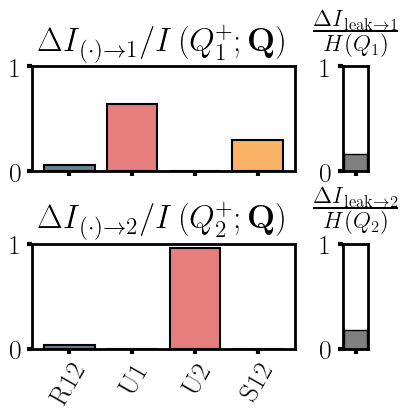

In [4]:
# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [50, 1]})
I_R, I_S, MI, info_leak = surd.run(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-14, h_pad=0)
plt.show()

## One-way coupling $Q_1 \rightarrow Q_2$

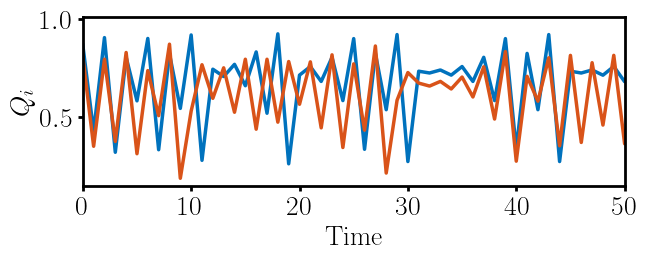

In [5]:
# System integration
q1, q2 = logistic(N, q10 = 0.2, q20=0.4, r1=3.7, r2=3.7, beta2to1=0,beta1to2=0.32)
X = np.array([q1, q2])
nvars = X.shape[0]

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(7, 3))
axs.plot(X[0, -1000:], linewidth=2.5, color="#0072BD", label=f'$\\rm{{Prey}}$')
axs.plot(X[1, -1000:], linewidth=2.5, color="#D95319", label=f'$\\rm{{Predator}}$')
axs.set_xlim(0, 50)  # Set x-axis limits
axs.set_ylim(0.15, 1.01)  # Set x-axis limits
axs.set_ylabel(f'$Q_i$')
axs.set_xlabel(f'$\\rm{{Time}}$')
plt.tight_layout()
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(2)
axs.tick_params(width=2)
plt.show()

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0874
    Unique (U):
        (1,)        : 0.9094
        (2,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0033
    Information Leak: 18.32%


SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.1377
    Unique (U):
        (1,)        : 0.0013
        (2,)        : 0.3622
    Synergystic (S):
        (1, 2)      : 0.4988
    Information Leak: 15.23%




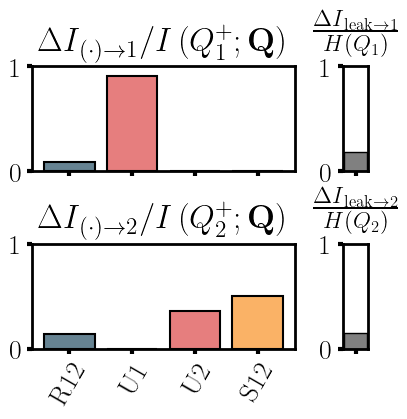

In [6]:
# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [50, 1]})
I_R, I_S, MI, info_leak = surd.run(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-14, h_pad=0)
plt.show()

## Two-way coupling $\beta_{2\rightarrow 1} > \beta_{1\rightarrow 2}$

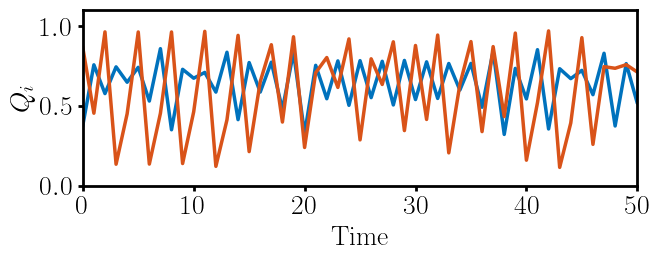

In [7]:
# System integration
q1, q2 = logistic(N, q10 = 0.2, q20=0.4, r1=3.5, r2=3.9, beta2to1=0.2,beta1to2=0.01)
X = np.array([q1, q2])
nvars = X.shape[0]

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(7, 3))
axs.plot(X[0, -1000:], linewidth=2.5, color="#0072BD", label=f'$\\rm{{Prey}}$')
axs.plot(X[1, -1000:], linewidth=2.5, color="#D95319", label=f'$\\rm{{Predator}}$')
axs.set_xlim(0, 50)  # Set x-axis limits
axs.set_ylim(0., 1.1)  # Set x-axis limits
axs.set_ylabel(f'$Q_i$')
axs.set_xlabel(f'$\\rm{{Time}}$')
plt.tight_layout()
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(2)
axs.tick_params(width=2)
plt.show()

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.1167
    Unique (U):
        (1,)        : 0.3373
        (2,)        : 0.0003
    Synergystic (S):
        (1, 2)      : 0.5457
    Information Leak: 16.29%


SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.0424
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.9454
    Synergystic (S):
        (1, 2)      : 0.0122
    Information Leak: 19.79%




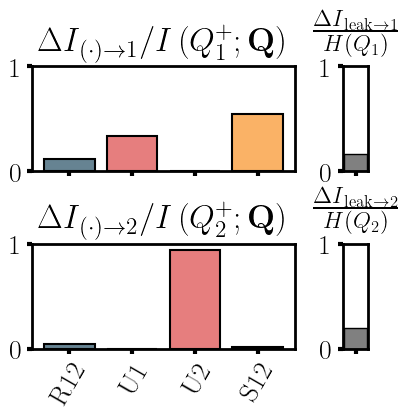

In [8]:
# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [50, 1]})
I_R, I_S, MI, info_leak = surd.run(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-14, h_pad=0)
plt.show()

## Two-way coupling $\beta_{2\rightarrow 1} < \beta_{1\rightarrow 2}$

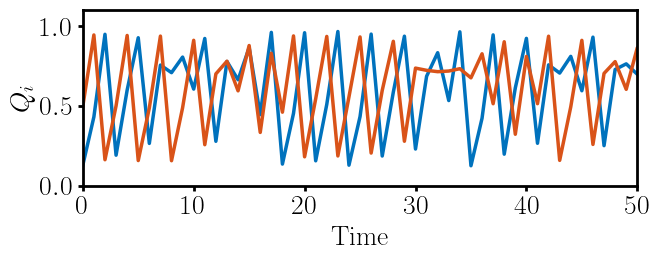

In [9]:
# System integration
q1, q2 = logistic(N, q10 = 0.2, q20=0.4, r1=3.9, r2=3.8, beta2to1=0.02,beta1to2=0.1)
X = np.array([q1, q2])
nvars = X.shape[0]

# Create a figure with subplots
fig, axs = plt.subplots(1, 1, figsize=(7, 3))
axs.plot(X[0, -1000:], linewidth=2.5, color="#0072BD", label=f'$\\rm{{Prey}}$')
axs.plot(X[1, -1000:], linewidth=2.5, color="#D95319", label=f'$\\rm{{Predator}}$')
axs.set_xlim(0, 50)  # Set x-axis limits
axs.set_ylim(0., 1.1)  # Set x-axis limits
axs.set_ylabel(f'$Q_i$')
axs.set_xlabel(f'$\\rm{{Time}}$')
plt.tight_layout()
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(2)
axs.tick_params(width=2)
plt.show()

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0400
    Unique (U):
        (1,)        : 0.9065
        (2,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.0535
    Information Leak: 19.90%


SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.0710
    Unique (U):
        (1,)        : 0.0000
        (2,)        : 0.6113
    Synergystic (S):
        (1, 2)      : 0.3177
    Information Leak: 17.11%




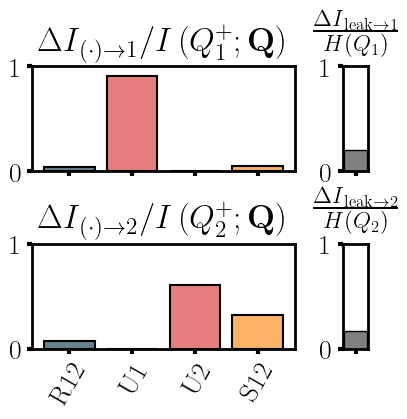

In [10]:
# Prepare Subplots
fig, axs = plt.subplots(nvars, 2, figsize=(9, 2.3*nvars), gridspec_kw={'width_ratios': [50, 1]})
I_R, I_S, MI, info_leak = surd.run(X, nvars, nlag, nbins, axs)

plt.tight_layout(w_pad=-14, h_pad=0)
plt.show()